<h1>Visualization - Understanding Our Cleaned Data</h1>

<h2>Preliminary Steps</h2>

Let's begin with importing the necessary libraries:

In [4]:
import pickle
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pygal
from pygal.style import Style
from collections import Counter
from sklearn.decomposition import PCA
from IPython.display import SVG
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
pip install pygal_maps_world

Note: you may need to restart the kernel to use updated packages.


For this step, we need to load the dataframe we cleaned in the Data Handling step:

In [6]:
df = pd.read_csv("df_cleaned.csv")
df.head()

,weekday,day,month,year,time,aircraft_type,num_of_engines,engine_type,engine_model,years_active,airframe_hrs,operator,occupants,accident_loc,above_ocean,flight_phase,damage,accident_latitude,accident_longtitude,fatalities
0,7,2.0,8,1919,13.566667,98,3.0,1,51,0.00,0.00,623,14.0,89,0,5.0,4.0,45.396389,10.888056,14.0
1,2,11.0,8,1919,13.566667,159,5.0,1,95,0.75,890.25,1722,7.0,187,0,4.0,3.0,51.941370,1.306789,1.0
2,4,18.0,8,1926,14.500000,51,4.0,1,88,0.00,47.00,314,15.0,187,0,5.0,3.0,-51.174000,0.868000,4.0
3,2,22.0,8,1927,8.250000,166,2.0,1,9,1.00,1187.00,1202,11.0,187,0,5.0,3.0,51.250000,0.216000,1.0
4,3,19.0,3,1929,13.566667,169,3.0,1,78,0.00,0.00,936,4.0,188,0,6.0,3.0,42.300000,-83.216660,4.0


We will use an auxiliary dataframe for a visualization function, that will use another dictionary we've extracted from the previous step. This dataframe matches between a country code to a country name, and we found it online (credited in the presentation):

In [7]:
cc = pd.read_csv("country_codes.csv")

We will also load the dictionary we exported from the data handling step, for the same purpose:

In [25]:
loc_file = open("loc_dict.pkl", "rb")
loc_dict = pickle.load(loc_file)

<h2>The Process</h2>

In this step we will draw conclusions about our data, before creating training a machine learning model on it.

<h3>1) One-Dimensional Visualizations</h3>

In this section we wll display visualization of our columns to understand how the accident entries are divided between their values:

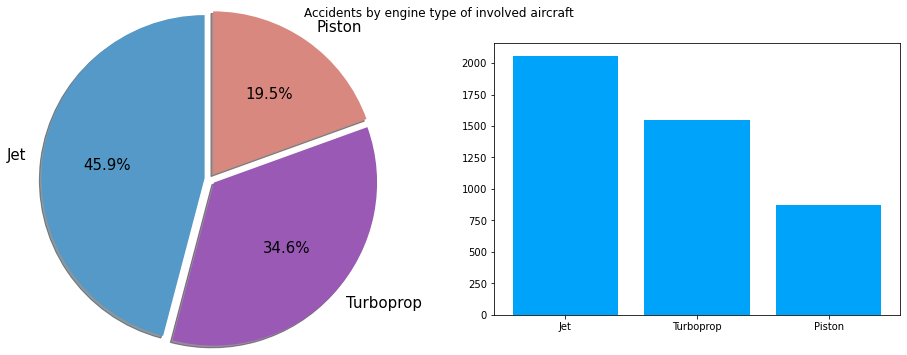

In [9]:
engine_types_sr = df['engine_type'].value_counts()
engine_types_vl = engine_types_sr.values.tolist()
engine_types_ndx = ['Jet', 'Turboprop', 'Piston']
engine_types_clr = ['#5499C7', '#9B59B6', '#D98880']

fig, axes = plt.subplots(1,2, figsize=(16,5))

fig.suptitle('Accidents by engine type of involved aircraft')

axes[0].pie(engine_types_vl, labels=engine_types_ndx, autopct='%1.1f%%', shadow=True, startangle=90,
           explode=(0.05, 0.05, 0.05), radius=1.5, colors=engine_types_clr, textprops={'fontsize':15})
axes[1].bar(engine_types_ndx, engine_types_vl, color='#00A3FA')

fig.show()

<b>Conclusions:</b><br>
1. Most accidents have occurred to jet aircrafts
2. Piston aircrafts are the least represented in the data frame

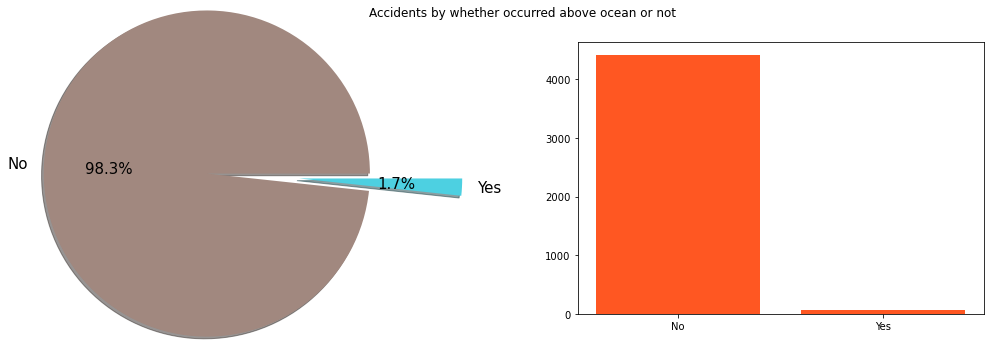

In [10]:
above_ocean_sr = df['above_ocean'].value_counts()
above_ocean_vl = above_ocean_sr.values.tolist()
above_ocean_ndx = ['No', 'Yes']
above_ocean_clr = ['#A1887F', '#4DD0E1']

fig, axes = plt.subplots(1,2, figsize=(16,5))

fig.suptitle('Accidents by whether occurred above ocean or not')

axes[0].pie(above_ocean_vl, labels=above_ocean_ndx, autopct='%1.1f%%', shadow=True, startangle=0,
           explode=(0.8, 0.05), radius=1.5, colors=above_ocean_clr, textprops={'fontsize':15})
axes[1].bar(above_ocean_ndx, above_ocean_vl, color='#FF5722')

fig.show()

<b>Conclusion:</b><br>
1. The landslide majority of accidents have occurred above land, which could be understood since most flights take their route above land for safety reasons

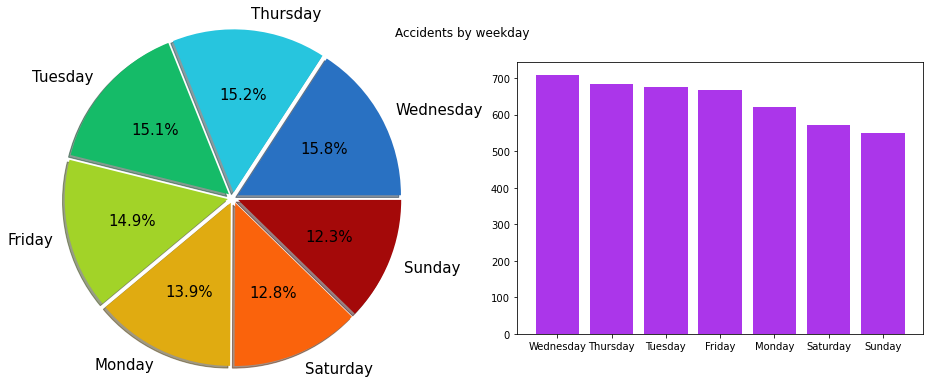

In [82]:
weekday_sr = df['weekday'].value_counts()
weekday_vl = weekday_sr.values.tolist()
weekday_ndx = ['Wednesday', 'Thursday', 'Tuesday', 'Friday', 'Monday', 'Saturday', 'Sunday']
weekday_clr = ['#2971C2', '#27C5DE', '#15BB68', '#A2D328', '#E0AB11', '#FA630C', '#A40909']

fig, axes = plt.subplots(1,2, figsize=(16,5))

fig.suptitle('Accidents by weekday')

axes[0].pie(weekday_vl, labels=weekday_ndx, autopct='%1.1f%%', shadow=True, startangle=0,
           explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), radius=1.5, colors=weekday_clr, textprops={'fontsize':15})
axes[1].bar(weekday_ndx, weekday_vl, color='#AB36EA')

fig.show()

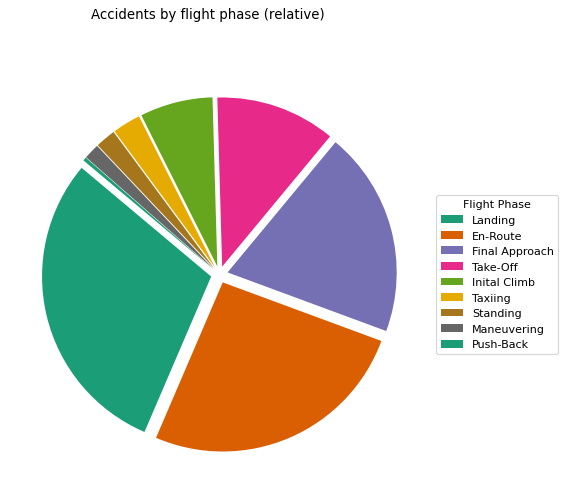

In [11]:
flight_phase_sr = df['flight_phase'].value_counts()
flight_phase_vl = flight_phase_sr.values.tolist()
flight_phase_ndx = ['Landing', 'En-Route', 'Final Approach', 'Take-Off', 'Inital Climb', 'Taxiing', 'Standing', 'Maneuvering', 'Push-Back']
flight_phase_clr = ['#E91E63', '#AB47BC', '#00BCD4', '#4CAF50', '#FFC107', '#283593', '#80CBC4', '#D1C4E9', '#607D8B']

fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

fig.suptitle('Accidents by flight phase (relative)')

def piefunc(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, autotexts = ax.pie(flight_phase_vl, 
                                  textprops=dict(color="black"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05))

ax.legend(wedges, labels=flight_phase_ndx, title="Flight Phase", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)

axes[1].pie(flight_phase_vl,textprops=dict(color="black"), colors=plt.cm.Dark2.colors,
            startangle=140, explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05))
axes[1].legend(labels=flight_phase_ndx, title="Flight Phase", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
#axes[1].bar(flight_phase_ndx, flight_phase_vl, color='#5C6BC0', width=0.5)
axes[1].legend(labels=flight_phase_ndx, loc='lower right')

fig.show()

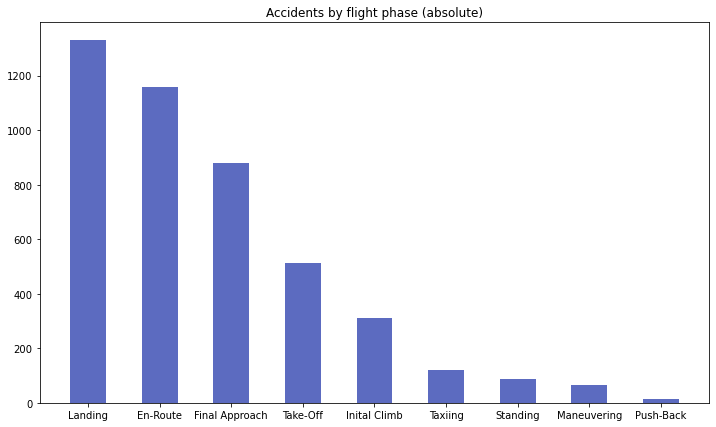

In [16]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(flight_phase_ndx, flight_phase_vl, color='#5C6BC0', width=0.5)
plt.title("Accidents by flight phase (absolute)")
plt.show()

<b>Conclusions:</b><br>
1. The Landing phase appears to be the riskiest flight phase.
2. In all Top-5 flight phases of accidents, the aircraft is high-speed motion.
3. In all Top-5 but the Take-Off phase, the aircraft is completely airborne.

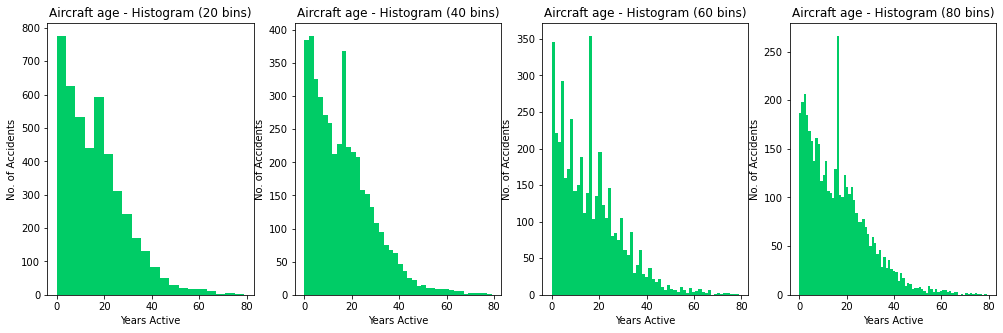

In [43]:
fig = plt.figure(figsize=(17,5))

fig1 = fig.add_subplot(1, 4, 1)
fig1.set_title('Aircraft age - Histogram (20 bins)')
fig1.set_xlabel('Years Active')
fig1.set_ylabel('No. of Accidents')
fig1.hist(df['years_active'], bins=20, color="#00CC66")

fig2 = fig.add_subplot(1, 4, 2)
fig2.set_title('Aircraft age - Histogram (40 bins)')
fig2.set_xlabel('Years Active')
fig2.set_ylabel('No. of Accidents')
fig2.hist(df['years_active'], bins=40, color="#00CC66")

fig3 = fig.add_subplot(1, 4, 3)
fig3.set_title('Aircraft age - Histogram (60 bins)')
fig3.set_xlabel('Years Active')
fig3.set_ylabel('No. of Accidents')
fig3.hist(df['years_active'], bins=60, color="#00CC66")


fig4 = fig.add_subplot(1, 4, 4)
fig4.set_title('Aircraft age - Histogram (80 bins)')
fig4.set_xlabel('Years Active')
fig4.set_ylabel('No. of Accidents')
fig4.hist(df['years_active'], bins=80, color="#00CC66")
plt.show()

<b>Colnclusions:</b><br>
1. In all histograms, there is a decreasing pattern
2. It can be concluded that generally, more 'younger' aircraft are involved in accidents
3. There is a spike around the ~18 years active mark, which probably is a result of the data filling performed in the previous step

<h3>2) Two-Dimensional Visulaizations</h3>

In this section we will understand which impact a pair of variables have on one another:

First, we will display a 'correlogram' to understand which variables have correlations between them, and how strong it is:

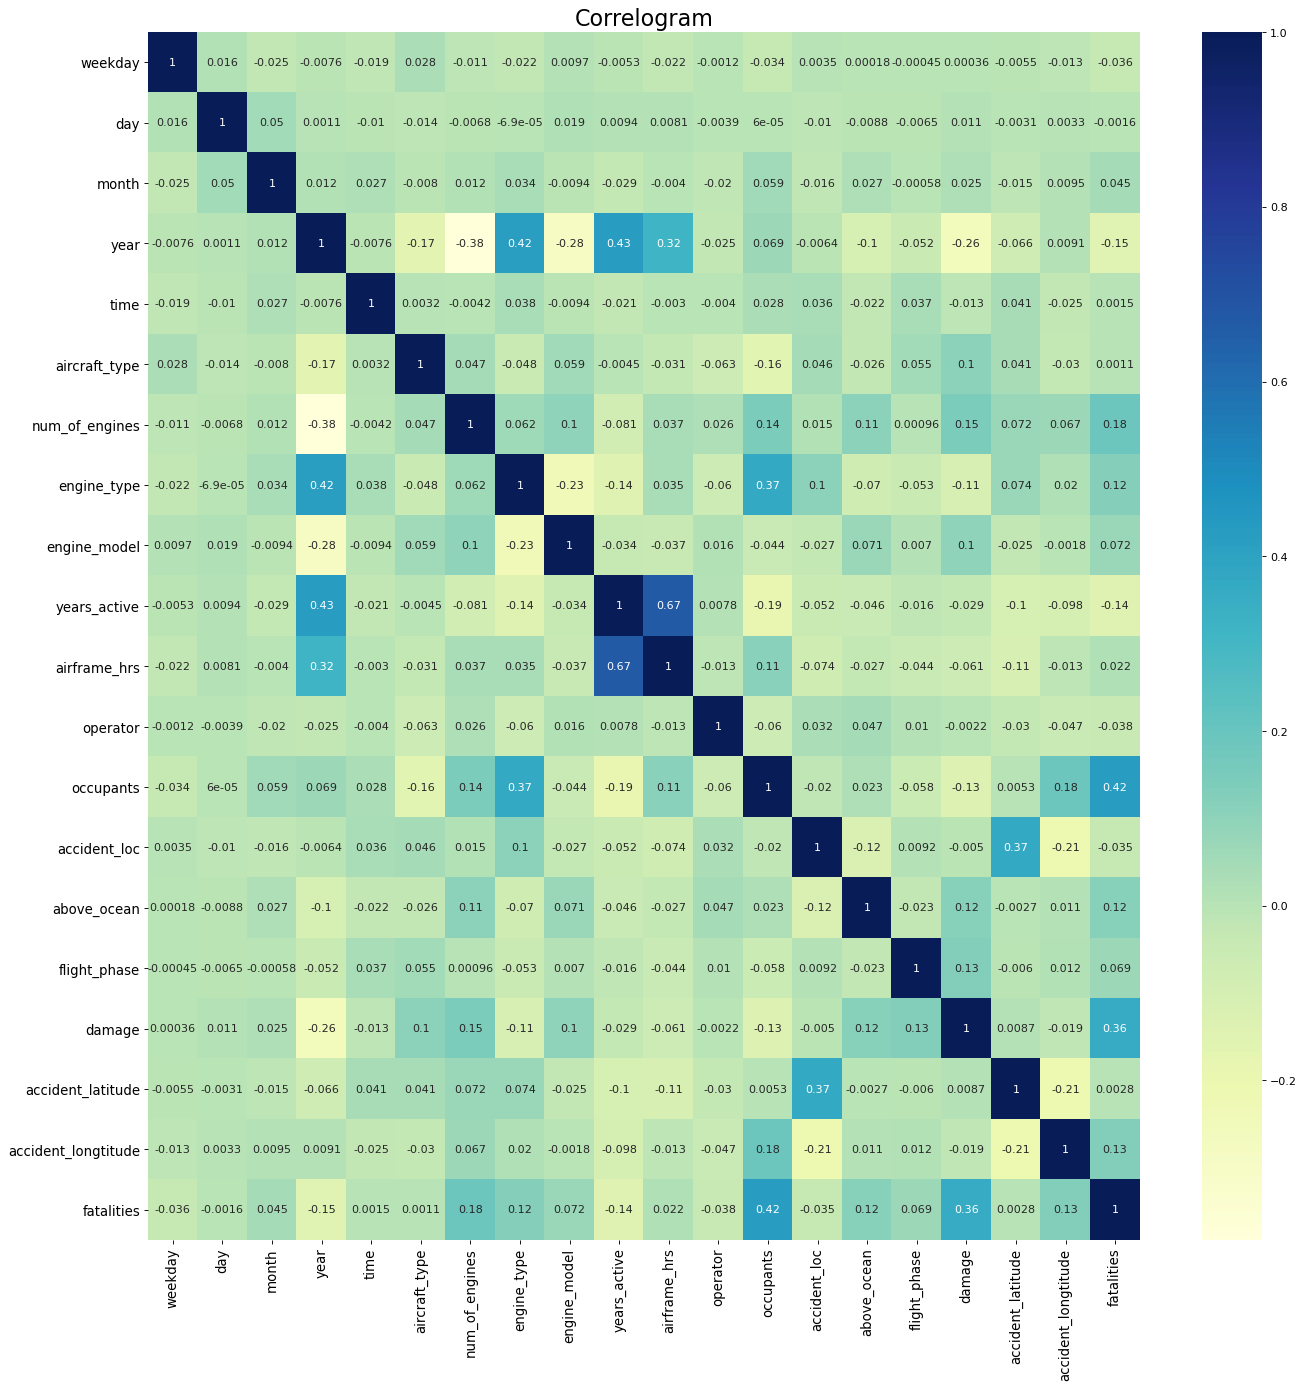

In [45]:
plt.figure(figsize=(20,20), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='YlGnBu', annot=True)

plt.title('Correlogram', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

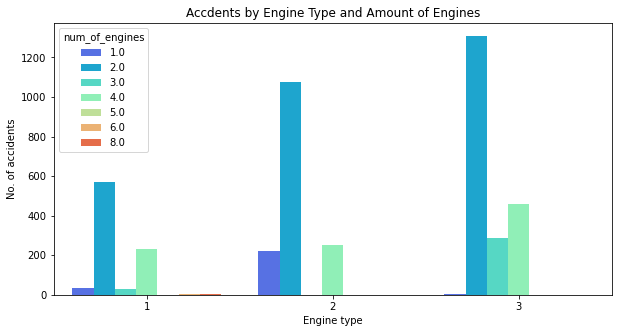

In [75]:
plt.figure(figsize=(10,5))
sns.countplot(x='engine_type',data=df, palette='rainbow',hue='num_of_engines')
plt.title("Accdents by Engine Type and Amount of Engines")
plt.xlabel("Engine type")
plt.ylabel("No. of accidents")
plt.show()

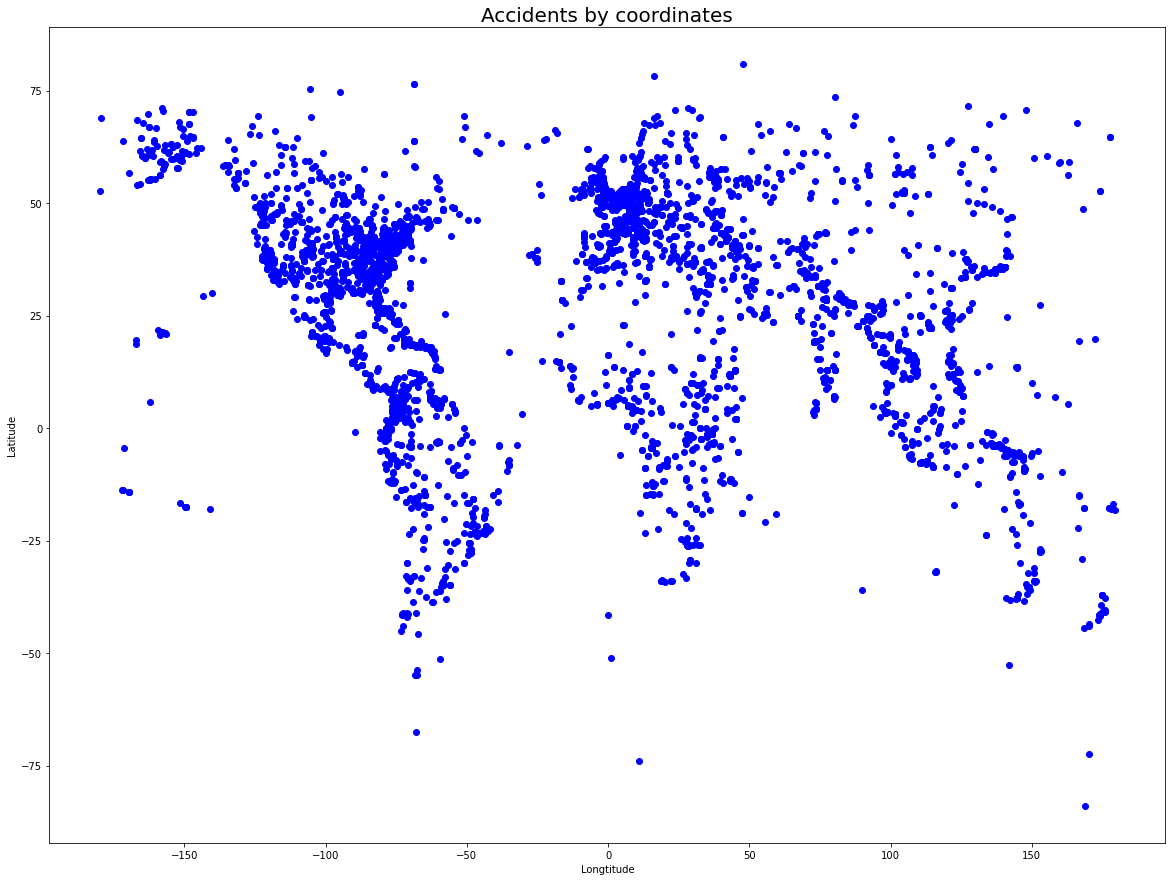

In [58]:
scat1 = plt.figure(figsize=(20,15))
plt.title("Accidents by coordinates", fontsize=20)
plt.scatter(df['accident_longtitude'], df['accident_latitude'], c ="blue")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()

<b>Conclusions:</b><br>
1. While there is no correlation between the latitude and longitutde, it forms an interesting visualization
2. The dots form a vague version of the world map and by understanding how our world map looks like, we can draw conclusions from this scatter plot.
3. Many dots are concentrated around what seems to be North-Eastern America, and around what seems to be North-Western Europe
4. The area of the visualization that seems to represent North Africa, has less accidents. Same goes for Siberia, Western China and Antarctica
5. This can help us to understand that most documented accidents have occurred mostly near inhabited areas

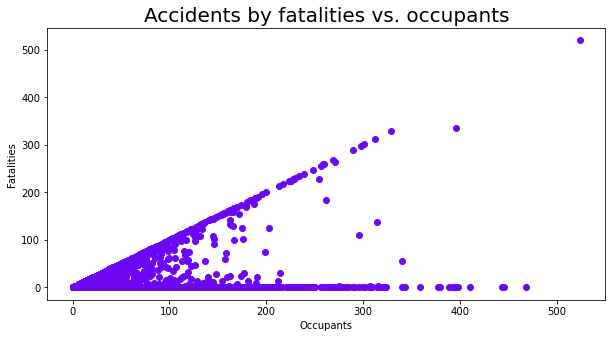

In [99]:
scat1 = plt.figure(figsize=(10,5))
plt.title("Accidents by fatalities vs. occupants", fontsize=20)
plt.scatter(df['occupants'], df['fatalities'], c ="#6B07F2")
plt.xlabel("Occupants")
plt.ylabel("Fatalities")
plt.show()

<b>Conclusions:</b><br>
1.There are two edge cases that can be clearly seen here<br>
<ul>
    <li>The flat line parallel to the X-axis represents accidents where there were no fatalities</li>
    <li>The straight line which looks like the line Y=X, represents accidents where all occupants have perished</li>
</ul>
2. All cases between these two lines represent accidents with fatlities but also with survivors.<br>
3. We can conclude that the majority of accidents were either completely fatal or completeyl non-fatal
4. The minority of accidents had both fatalities and surivivors

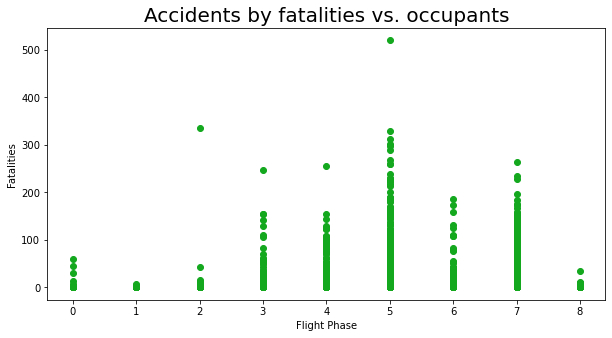

In [100]:
scat2 = plt.figure(figsize=(10,5))
plt.title("Accidents by fatalities vs. occupants", fontsize=20)
plt.scatter(df['flight_phase'], df['fatalities'], c ="#13A81E")
plt.xlabel("Flight Phase")
plt.ylabel("Fatalities")
plt.show()

<b>Conclusion:</b><br>
1. Accidents that occurred in flight stages where the aircraft is airborne, or in a critical stage like take-off or landing (steps 3-7) - had higher chances to have higher amount of fatalities

<h3>3) Extras</h3>

Even when we used a catter plot to create a 'world map'-like visualization, we wanted to use a dedicated world map visualization to undersatnd which countries and territories had the most accidents, derived from the 'accidents_loc' column, rather than by the 'accident_latitude' and 'accident_longtitude'.

In [14]:
worldmap_dict = {}
for i in range (0,len(cc['code'])):
    try:
        worldmap_dict[cc['code'][i]] = df['accident_loc'].value_counts(sort=False)[loc_dict[cc['country'][i]]]
    except:
        worldmap_dict[cc['code'][i]] = 0

In [24]:
worldmap = pygal.maps.world.World(style=custom_style)
worldmap.title = 'Accident frequency by country and territory'
worldmap.add('Accident Frequency', worldmap_dict)

worldmap.render_to_file('world_map_visualization.svg')

The visualization is saved in <b>"world_map_visualization.svg"</b> in our GitHub